# simple demonstration

In [1]:
import pandas as pd

from ctg.directories import Directories
from ctg.tokendata import TokenData
from ctg.charts import Chart
from ctg.ctg import CTG


def verify_and_update_datasets():
    """
    Verifies if datasets are updated. 
    Updates after 0:36:00 the next day UTC.
    """ 
    # Updating data
    td = TokenData()
    
    tokens = ['pulsex','pulsechain']
    
    # open record of the updates
    #dataset_updates = pd.read_pickle('dataset_updates.pkl')
    dataset_updates = pd.read_pickle(Directories().dataset_updates)
    
    for token in tokens:
        # reads last date:
        last_update = dataset_updates.loc[dataset_updates.dataset==token,'last_update'].values[0] 
        yesterday = pd.Timestamp.utcnow() - pd.Timedelta(1,'day')
        
        # if (last_update < yesterday) & (utcnow > today.normalize + 36min), then:    
        
        if (pd.Timestamp(last_update).tz_localize(tz='UTC') < yesterday.normalize()) &\
           (pd.Timestamp.utcnow() > pd.Timestamp.utcnow().normalize() + pd.Timedelta(36,'minutes')):
            ### updating dataframes
            df_updated = td.update_dataset(token = token, save=True)
            today_update = df_updated.tail(1).loc[:,'date'].values[0]
            
            # replaces last updated date in the record
            dataset_updates.loc[(dataset_updates.dataset==token),'last_update'] = today_update 
            #dataset_updates.to_pickle('dataset_updates.pkl') 
            dataset_updates.to_pickle(Directories().dataset_updates)        
        else:
            print(f"Dataset for {token} is already updated. | last update {last_update}")

In [2]:
%%time
verify_and_update_datasets()

Dataset for pulsex is already updated. | last update 2024-02-20T00:00:00.000000000
Dataset for pulsechain is already updated. | last update 2024-02-20T00:00:00.000000000
CPU times: user 2.96 ms, sys: 0 ns, total: 2.96 ms
Wall time: 2.86 ms


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed



CPU times: user 588 ms, sys: 34.8 ms, total: 623 ms
Wall time: 5.85 s


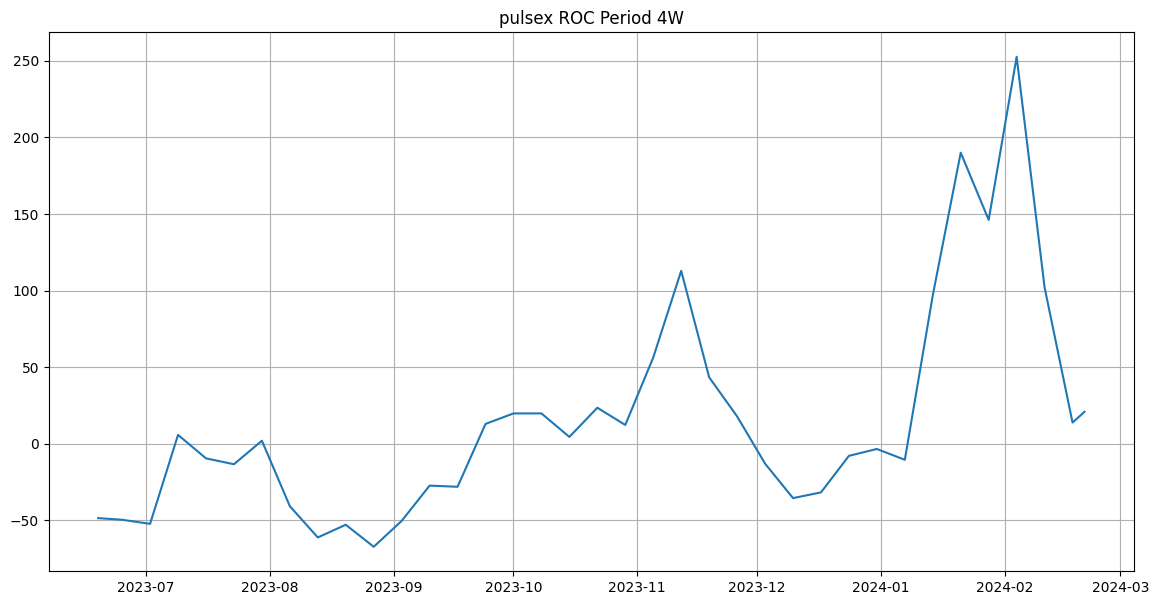

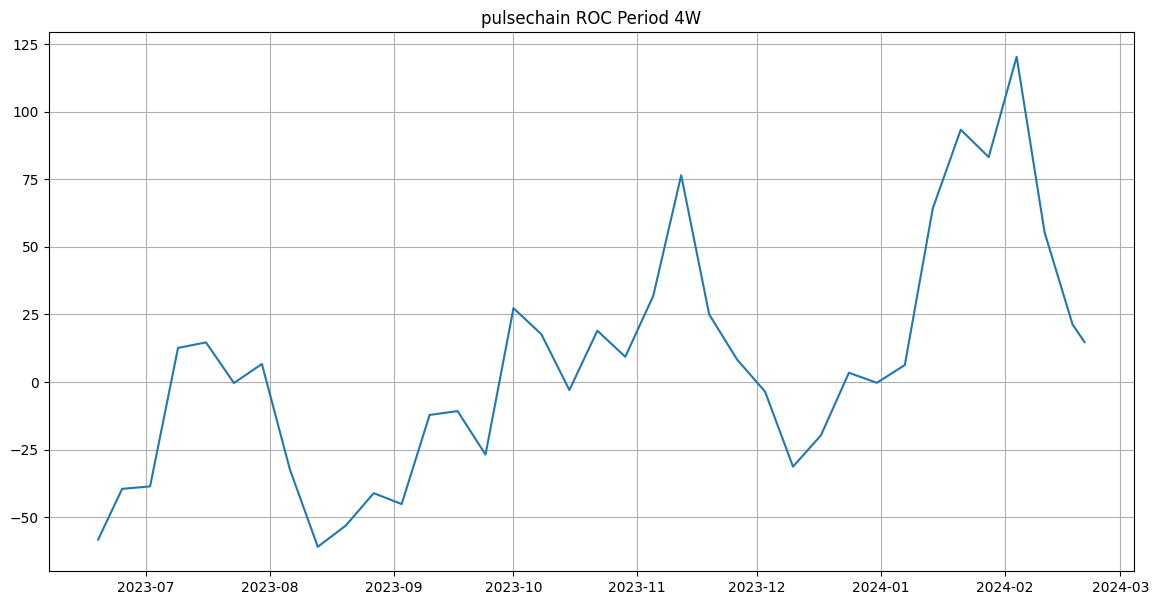

In [3]:
%%time
# Updating data
td = TokenData()
chart = Chart()

for token in ['pulsex','pulsechain']:
    asset_data = td.include_last_quote(token=token, clean_data=True)
    indicator = CTG(asset_data=asset_data)
    #
    df = indicator.create_base_data()
    chart.roc_chart(df, token_name=token)
    print()